In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'png'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
import seaborn as sns
colors = sns.color_palette('tab10', 20)

import pandapower as pp
import pandapower.networks as pn
from pandapower.plotting import simple_plot, draw_collections
from pandapower.plotting import create_bus_collection
from pandapower.plotting import create_line_collection
from pandapower.plotting import create_trafo_collection

In [2]:
net2848 = pn.case2848rte()

net2848.bus_geodata.to_excel('geodata.xlsx')

pp.to_excel(net2848, 'net2848.xlsx')

/Users/yadongzhang/Library/Python/3.9/lib/python/site-packages/pandapower/file_io.py:99: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [3]:
# Read geodata
geodata = pd.read_excel('geodata.xlsx', index_col=0)

# get origin
origin_x = 25
origin_y = -6

# Get relative location
geodata['x'] -= origin_x
geodata['y'] -= origin_y

#### Select buses in each zone

In [4]:
geodata = geodata[['x', 'y']]

k1, k2, k3, k4, k5, k6 = np.tan(1*np.pi/8), np.tan(2*np.pi/8), np.tan(3*np.pi/8), np.tan(5*np.pi/8), np.tan(6*np.pi/8), np.tan(7*np.pi/8)

zone1_bidx = (geodata['x'] > 0) & (geodata['y'] > 0) & (geodata['y'] < k1*geodata['x'])
zone2_bidx = (geodata['x'] > 0) & (geodata['y'] > 0) & (geodata['y'] > k1*geodata['x']) & (geodata['y'] < k2*geodata['x'])
zone3_bidx = (geodata['x'] > 0) & (geodata['y'] > 0) & (geodata['y'] > k2*geodata['x']) & (geodata['y'] < k3*geodata['x'])
zone4_bidx = (geodata['x'] > 0) & (geodata['y'] > 0) & (geodata['y'] > k3*geodata['x'])
zone5_bidx = (geodata['x'] < 0) & (geodata['y'] > 0) & (geodata['y'] > k4*geodata['x'])
zone6_bidx = (geodata['x'] < 0) & (geodata['y'] > 0) & (geodata['y'] > k5*geodata['x']) & (geodata['y'] < k4*geodata['x'])
zone7_bidx = (geodata['x'] < 0) & (geodata['y'] > 0) & (geodata['y'] > k6*geodata['x']) & (geodata['y'] < k5*geodata['x'])
zone8_bidx = (geodata['x'] < 0) & (geodata['y'] > 0) & (geodata['y'] < k6*geodata['x']) 
zone9_bidx = (geodata['x'] < 0) & (geodata['y'] < 0) & (geodata['y'] > k1*geodata['x'])
zone10_bidx = (geodata['x'] < 0) & (geodata['y'] < 0) & (geodata['y'] < k1*geodata['x']) & (geodata['y'] > k2*geodata['x'])
zone11_bidx = (geodata['x'] < 0) & (geodata['y'] < 0) & (geodata['y'] < k2*geodata['x']) & (geodata['y'] > k3*geodata['x'])
zone12_bidx = (geodata['x'] < 0) & (geodata['y'] < 0) & (geodata['y'] < k3*geodata['x'])
zone13_bidx = (geodata['x'] > 0) & (geodata['y'] < 0) & (geodata['y'] < k4*geodata['x'])
zone14_bidx = (geodata['x'] > 0) & (geodata['y'] < 0) & (geodata['y'] > k4*geodata['x']) & (geodata['y'] < k5*geodata['x'])
zone15_bidx = (geodata['x'] > 0) & (geodata['y'] < 0) & (geodata['y'] > k5*geodata['x']) & (geodata['y'] < k6*geodata['x'])
zone16_bidx = (geodata['x'] > 0) & (geodata['y'] < 0) & (geodata['y'] > k6*geodata['x'])

In [8]:
# Select buses in each zone
zone1_bus = geodata.index.values[zone1_bidx]
zone2_bus = geodata.index.values[zone2_bidx]
zone3_bus = geodata.index.values[zone3_bidx]
zone4_bus = geodata.index.values[zone4_bidx]
zone5_bus = geodata.index.values[zone5_bidx]
zone6_bus = geodata.index.values[zone6_bidx]
zone7_bus = geodata.index.values[zone7_bidx]
zone8_bus = geodata.index.values[zone8_bidx]
zone9_bus = geodata.index.values[zone9_bidx]
zone10_bus = geodata.index.values[zone10_bidx]
zone11_bus = geodata.index.values[zone11_bidx]
zone12_bus = geodata.index.values[zone12_bidx]
zone13_bus = geodata.index.values[zone13_bidx]
zone14_bus = geodata.index.values[zone14_bidx]
zone15_bus = geodata.index.values[zone15_bidx]
zone16_bus = geodata.index.values[zone16_bidx]

In [7]:
zone1_bidx.sum(), zone2_bidx.sum(), zone3_bidx.sum(), zone4_bidx.sum(), zone5_bidx.sum(), zone6_bidx.sum(), zone7_bidx.sum(), zone8_bidx.sum(), zone9_bidx.sum(), zone10_bidx.sum(), zone11_bidx.sum(), zone12_bidx.sum(), zone13_bidx.sum(), zone14_bidx.sum(), zone15_bidx.sum(), zone16_bidx.sum()

(111, 134, 167, 127, 108, 71, 116, 138, 198, 213, 241, 310, 268, 266, 183, 197)

The number of given colors (1) is smaller than the number of nodes (111) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (134) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (167) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (127) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (108) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (71) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (116) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number of nodes (138) to draw! The colors will be repeated to fit.
The number of given colors (1) is smaller than the number

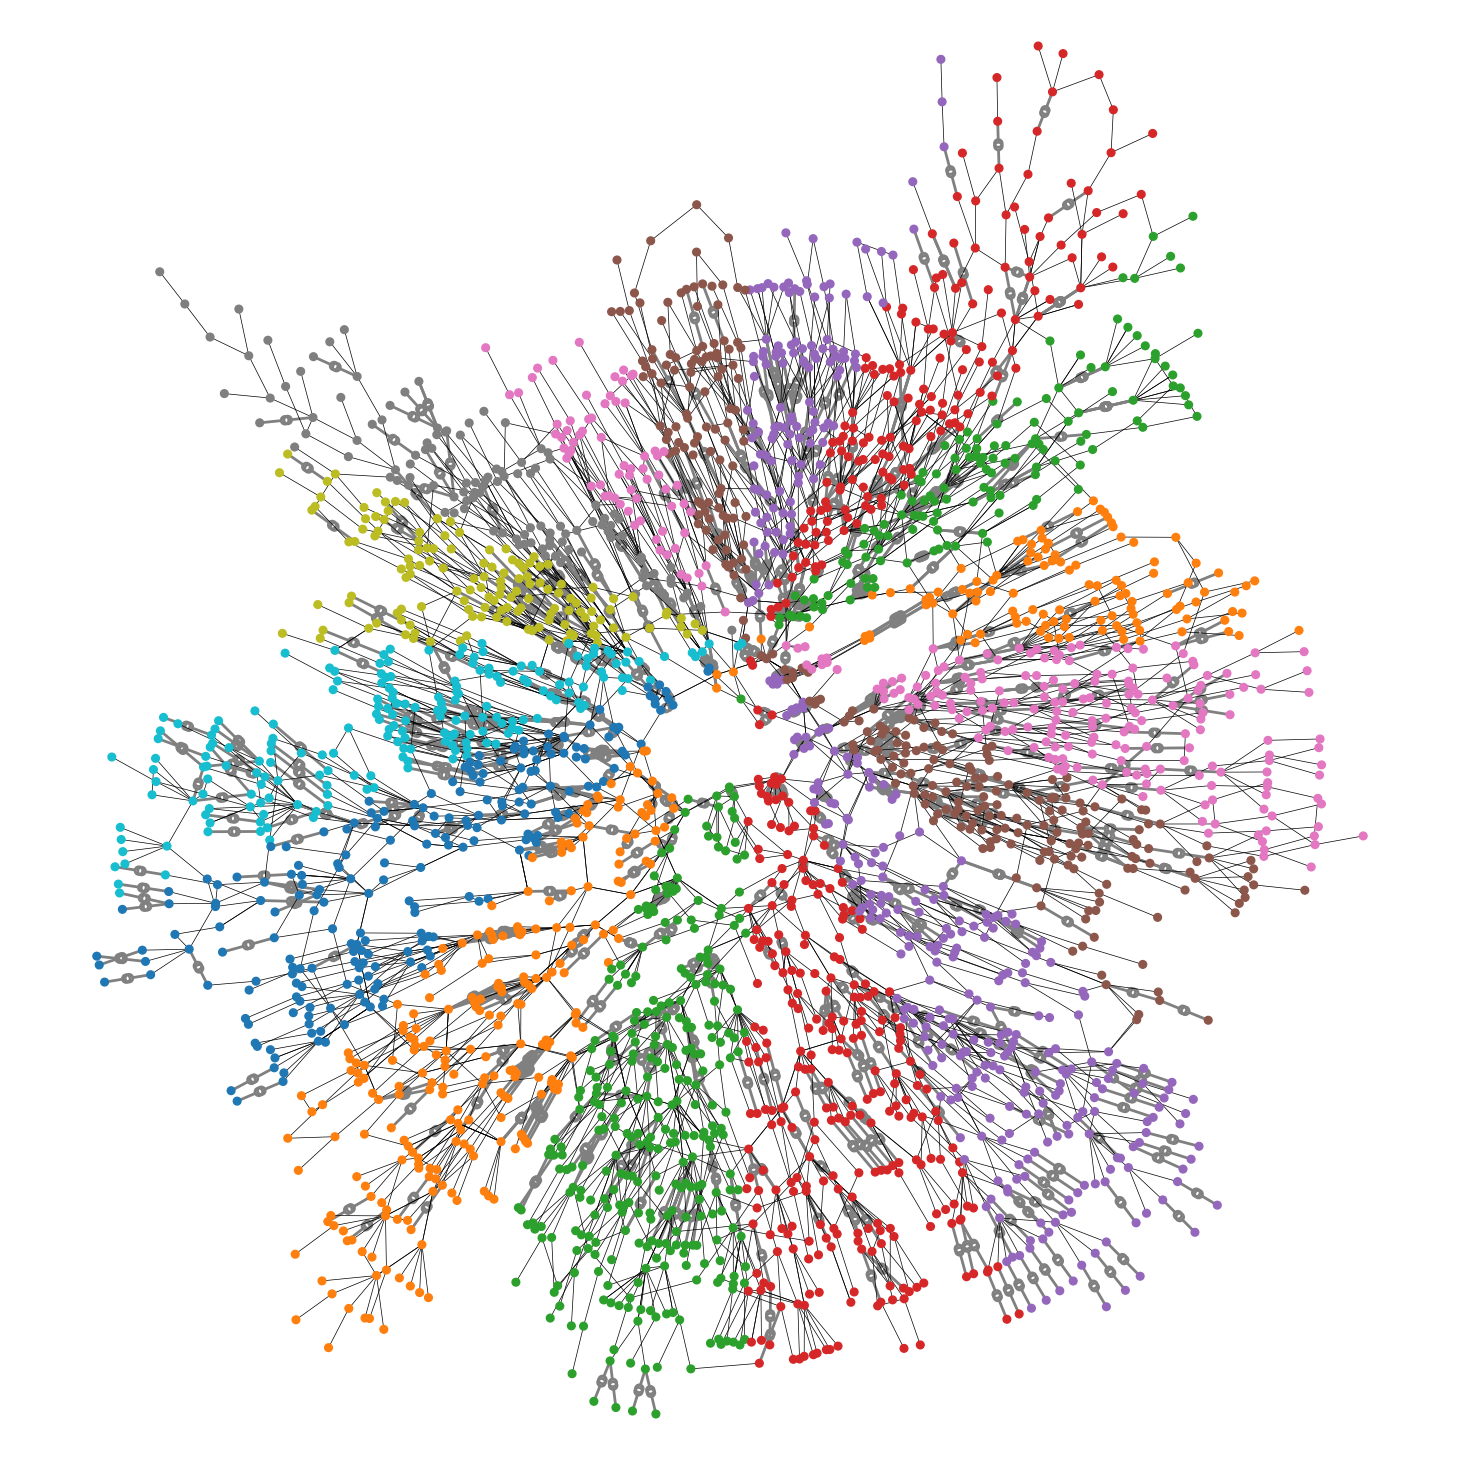

In [9]:
# Create bus collections
zone1_bc = create_bus_collection(net2848, buses=zone1_bus, color=colors[1], size=0.1)
zone2_bc = create_bus_collection(net2848, buses=zone2_bus, color=colors[2], size=0.1)
zone3_bc = create_bus_collection(net2848, buses=zone3_bus, color=colors[3], size=0.1)
zone4_bc = create_bus_collection(net2848, buses=zone4_bus, color=colors[4], size=0.1)
zone5_bc = create_bus_collection(net2848, buses=zone5_bus, color=colors[5], size=0.1)
zone6_bc = create_bus_collection(net2848, buses=zone6_bus, color=colors[6], size=0.1)
zone7_bc = create_bus_collection(net2848, buses=zone7_bus, color=colors[7], size=0.1)
zone8_bc = create_bus_collection(net2848, buses=zone8_bus, color=colors[8], size=0.1)
zone9_bc = create_bus_collection(net2848, buses=zone9_bus, color=colors[9], size=0.1)
zone10_bc = create_bus_collection(net2848, buses=zone10_bus, color=colors[10], size=0.1)
zone11_bc = create_bus_collection(net2848, buses=zone11_bus, color=colors[11], size=0.1)
zone12_bc = create_bus_collection(net2848, buses=zone12_bus, color=colors[12], size=0.1)
zone13_bc = create_bus_collection(net2848, buses=zone13_bus, color=colors[13], size=0.1)
zone14_bc = create_bus_collection(net2848, buses=zone14_bus, color=colors[14], size=0.1)
zone15_bc = create_bus_collection(net2848, buses=zone15_bus, color=colors[15], size=0.1)
zone16_bc = create_bus_collection(net2848, buses=zone16_bus, color=colors[16], size=0.1)

# Create line collection
lc = create_line_collection(net2848, color='black', linewidth=0.5, zorder=-100)

# Create trafo collection
tc = create_trafo_collection(net2848, color='gray', size=0.1, zorder=-200)

zone_list = [zone1_bc, zone2_bc, zone3_bc, zone4_bc, zone5_bc, zone6_bc, zone7_bc, zone8_bc, zone9_bc, zone10_bc, zone11_bc, zone12_bc, zone13_bc, zone14_bc, zone15_bc, zone16_bc, lc, tc]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
draw_collections(zone_list, ax=ax)
fig.savefig('Case2848rte.pdf')

plt.tight_layout()
plt.show()
plt.close('all')

In [10]:
# Select load buses in each zone
load_bus = np.array(net2848.load.bus) + 1
zone1_load_bus = load_bus[np.isin(load_bus, zone1_bus)]
zone2_load_bus = load_bus[np.isin(load_bus, zone2_bus)]
zone3_load_bus = load_bus[np.isin(load_bus, zone3_bus)]
zone4_load_bus = load_bus[np.isin(load_bus, zone4_bus)]
zone5_load_bus = load_bus[np.isin(load_bus, zone5_bus)]
zone6_load_bus = load_bus[np.isin(load_bus, zone6_bus)]
zone7_load_bus = load_bus[np.isin(load_bus, zone7_bus)]
zone8_load_bus = load_bus[np.isin(load_bus, zone8_bus)]
zone9_load_bus = load_bus[np.isin(load_bus, zone9_bus)]
zone10_load_bus = load_bus[np.isin(load_bus, zone10_bus)]
zone11_load_bus = load_bus[np.isin(load_bus, zone11_bus)]
zone12_load_bus = load_bus[np.isin(load_bus, zone12_bus)]
zone13_load_bus = load_bus[np.isin(load_bus, zone13_bus)]
zone14_load_bus = load_bus[np.isin(load_bus, zone14_bus)]
zone15_load_bus = load_bus[np.isin(load_bus, zone15_bus)]
zone16_load_bus = load_bus[np.isin(load_bus, zone16_bus)]

In [11]:
# Select gen buses in each zone
gen_bus = np.concatenate([np.array(net2848.gen.bus), np.array(net2848.ext_grid.bus)]) + 1
zone1_gen_bus = gen_bus[np.isin(gen_bus, zone1_bus)]
zone2_gen_bus = gen_bus[np.isin(gen_bus, zone2_bus)]
zone3_gen_bus = gen_bus[np.isin(gen_bus, zone3_bus)]
zone4_gen_bus = gen_bus[np.isin(gen_bus, zone4_bus)]
zone5_gen_bus = gen_bus[np.isin(gen_bus, zone5_bus)]
zone6_gen_bus = gen_bus[np.isin(gen_bus, zone6_bus)]
zone7_gen_bus = gen_bus[np.isin(gen_bus, zone7_bus)]
zone8_gen_bus = gen_bus[np.isin(gen_bus, zone8_bus)]
zone9_gen_bus = gen_bus[np.isin(gen_bus, zone9_bus)]
zone10_gen_bus = gen_bus[np.isin(gen_bus, zone10_bus)]
zone11_gen_bus = gen_bus[np.isin(gen_bus, zone11_bus)]
zone12_gen_bus = gen_bus[np.isin(gen_bus, zone12_bus)]
zone13_gen_bus = gen_bus[np.isin(gen_bus, zone13_bus)]
zone14_gen_bus = gen_bus[np.isin(gen_bus, zone14_bus)]
zone15_gen_bus = gen_bus[np.isin(gen_bus, zone15_bus)]
zone16_gen_bus = gen_bus[np.isin(gen_bus, zone16_bus)]

In [12]:
# Select wind buses in each zone
# Set random seed
random.seed(20)
np.random.seed(20)

# Select wind buses
zone1_wind_bus = np.array(random.sample(list(zone1_gen_bus), int(0.2*zone1_gen_bus.shape[0])))
zone2_wind_bus = np.array(random.sample(list(zone2_gen_bus), int(0.2*zone2_gen_bus.shape[0])))
zone3_wind_bus = np.array(random.sample(list(zone3_gen_bus), int(0.2*zone3_gen_bus.shape[0])))
zone4_wind_bus = np.array(random.sample(list(zone4_gen_bus), int(0.2*zone4_gen_bus.shape[0])))
zone5_wind_bus = np.array(random.sample(list(zone5_gen_bus), int(0.2*zone5_gen_bus.shape[0])))
zone6_wind_bus = np.array(random.sample(list(zone6_gen_bus), int(0.2*zone6_gen_bus.shape[0])))
zone7_wind_bus = np.array(random.sample(list(zone7_gen_bus), int(0.2*zone7_gen_bus.shape[0])))
zone8_wind_bus = np.array(random.sample(list(zone8_gen_bus), int(0.2*zone8_gen_bus.shape[0])))
zone9_wind_bus = np.array(random.sample(list(zone9_gen_bus), int(0.2*zone9_gen_bus.shape[0])))
zone10_wind_bus = np.array(random.sample(list(zone10_gen_bus), int(0.2*zone10_gen_bus.shape[0])))
zone11_wind_bus = np.array(random.sample(list(zone11_gen_bus), int(0.2*zone11_gen_bus.shape[0])))
zone12_wind_bus = np.array(random.sample(list(zone12_gen_bus), int(0.2*zone12_gen_bus.shape[0])))
zone13_wind_bus = np.array(random.sample(list(zone13_gen_bus), int(0.2*zone13_gen_bus.shape[0])))
zone14_wind_bus = np.array(random.sample(list(zone14_gen_bus), int(0.2*zone14_gen_bus.shape[0])))
zone15_wind_bus = np.array(random.sample(list(zone15_gen_bus), int(0.2*zone15_gen_bus.shape[0])))
zone16_wind_bus = np.array(random.sample(list(zone16_gen_bus), int(0.2*zone16_gen_bus.shape[0])))

wind_bus = np.concatenate([zone1_wind_bus, zone2_wind_bus, zone3_wind_bus, zone4_wind_bus, 
                           zone5_wind_bus, zone6_wind_bus, zone7_wind_bus, zone8_wind_bus,
                           zone9_wind_bus, zone10_wind_bus, zone11_wind_bus, zone12_wind_bus, 
                           zone13_wind_bus, zone14_wind_bus, zone15_wind_bus, zone16_wind_bus])

In [13]:
# Select thermal buses in each zone
zone1_thermal_bus = zone1_gen_bus[~np.isin(zone1_gen_bus, zone1_wind_bus)]
zone2_thermal_bus = zone2_gen_bus[~np.isin(zone2_gen_bus, zone2_wind_bus)]
zone3_thermal_bus = zone3_gen_bus[~np.isin(zone3_gen_bus, zone3_wind_bus)]
zone4_thermal_bus = zone4_gen_bus[~np.isin(zone4_gen_bus, zone4_wind_bus)]
zone5_thermal_bus = zone5_gen_bus[~np.isin(zone5_gen_bus, zone5_wind_bus)]
zone6_thermal_bus = zone6_gen_bus[~np.isin(zone6_gen_bus, zone6_wind_bus)]
zone7_thermal_bus = zone7_gen_bus[~np.isin(zone7_gen_bus, zone7_wind_bus)]
zone8_thermal_bus = zone8_gen_bus[~np.isin(zone8_gen_bus, zone8_wind_bus)]
zone9_thermal_bus = zone9_gen_bus[~np.isin(zone9_gen_bus, zone9_wind_bus)]
zone10_thermal_bus = zone10_gen_bus[~np.isin(zone10_gen_bus, zone10_wind_bus)]
zone11_thermal_bus = zone11_gen_bus[~np.isin(zone11_gen_bus, zone11_wind_bus)]
zone12_thermal_bus = zone12_gen_bus[~np.isin(zone12_gen_bus, zone12_wind_bus)]
zone13_thermal_bus = zone13_gen_bus[~np.isin(zone13_gen_bus, zone13_wind_bus)]
zone14_thermal_bus = zone14_gen_bus[~np.isin(zone14_gen_bus, zone14_wind_bus)]
zone15_thermal_bus = zone15_gen_bus[~np.isin(zone15_gen_bus, zone15_wind_bus)]
zone16_thermal_bus = zone16_gen_bus[~np.isin(zone16_gen_bus, zone16_wind_bus)]

thermal_bus = np.concatenate([zone1_thermal_bus, zone2_thermal_bus, zone3_thermal_bus, zone4_thermal_bus,
                              zone5_thermal_bus, zone6_thermal_bus, zone7_thermal_bus, zone8_thermal_bus,
                              zone9_thermal_bus, zone10_thermal_bus, zone11_thermal_bus, zone12_thermal_bus,
                              zone13_thermal_bus, zone14_thermal_bus, zone15_thermal_bus, zone16_thermal_bus])

In [14]:
# Save all files
pd.DataFrame(load_bus).to_csv('load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(gen_bus).to_csv('gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(wind_bus).to_csv('wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(thermal_bus).to_csv('thermal_bus.csv', header=None, index=None, columns=None)

pd.DataFrame(zone1_bus).to_csv('zone1_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone2_bus).to_csv('zone2_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone3_bus).to_csv('zone3_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone4_bus).to_csv('zone4_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone5_bus).to_csv('zone5_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone6_bus).to_csv('zone6_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone7_bus).to_csv('zone7_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone8_bus).to_csv('zone8_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone9_bus).to_csv('zone9_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone10_bus).to_csv('zone10_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone11_bus).to_csv('zone11_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone12_bus).to_csv('zone12_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone13_bus).to_csv('zone13_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone14_bus).to_csv('zone14_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone15_bus).to_csv('zone15_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone16_bus).to_csv('zone16_bus.csv', header=None, index=None, columns=None)

pd.DataFrame(zone1_load_bus).to_csv('zone1_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone2_load_bus).to_csv('zone2_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone3_load_bus).to_csv('zone3_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone4_load_bus).to_csv('zone4_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone5_load_bus).to_csv('zone5_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone6_load_bus).to_csv('zone6_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone7_load_bus).to_csv('zone7_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone8_load_bus).to_csv('zone8_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone9_load_bus).to_csv('zone9_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone10_load_bus).to_csv('zone10_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone11_load_bus).to_csv('zone11_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone12_load_bus).to_csv('zone12_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone13_load_bus).to_csv('zone13_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone14_load_bus).to_csv('zone14_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone15_load_bus).to_csv('zone15_load_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone16_load_bus).to_csv('zone16_load_bus.csv', header=None, index=None, columns=None)

pd.DataFrame(zone1_gen_bus).to_csv('zone1_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone2_gen_bus).to_csv('zone2_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone3_gen_bus).to_csv('zone3_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone4_gen_bus).to_csv('zone4_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone5_gen_bus).to_csv('zone5_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone6_gen_bus).to_csv('zone6_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone7_gen_bus).to_csv('zone7_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone8_gen_bus).to_csv('zone8_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone9_gen_bus).to_csv('zone9_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone10_gen_bus).to_csv('zone10_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone11_gen_bus).to_csv('zone11_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone12_gen_bus).to_csv('zone12_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone13_gen_bus).to_csv('zone13_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone14_gen_bus).to_csv('zone14_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone15_gen_bus).to_csv('zone15_gen_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone16_gen_bus).to_csv('zone16_gen_bus.csv', header=None, index=None, columns=None)

pd.DataFrame(zone1_wind_bus).to_csv('zone1_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone2_wind_bus).to_csv('zone2_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone3_wind_bus).to_csv('zone3_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone4_wind_bus).to_csv('zone4_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone5_wind_bus).to_csv('zone5_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone6_wind_bus).to_csv('zone6_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone7_wind_bus).to_csv('zone7_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone8_wind_bus).to_csv('zone8_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone9_wind_bus).to_csv('zone9_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone10_wind_bus).to_csv('zone10_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone11_wind_bus).to_csv('zone11_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone12_wind_bus).to_csv('zone12_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone13_wind_bus).to_csv('zone13_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone14_wind_bus).to_csv('zone14_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone15_wind_bus).to_csv('zone15_wind_bus.csv', header=None, index=None, columns=None)
pd.DataFrame(zone16_wind_bus).to_csv('zone16_wind_bus.csv', header=None, index=None, columns=None)

pd.DataFrame(zone1_thermal_bus).to_csv('zone1_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone2_thermal_bus).to_csv('zone2_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone3_thermal_bus).to_csv('zone3_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone4_thermal_bus).to_csv('zone4_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone5_thermal_bus).to_csv('zone5_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone6_thermal_bus).to_csv('zone6_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone7_thermal_bus).to_csv('zone7_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone8_thermal_bus).to_csv('zone8_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone9_thermal_bus).to_csv('zone9_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone10_thermal_bus).to_csv('zone10_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone11_thermal_bus).to_csv('zone11_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone12_thermal_bus).to_csv('zone12_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone13_thermal_bus).to_csv('zone13_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone14_thermal_bus).to_csv('zone14_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone15_thermal_bus).to_csv('zone15_thermal_buses.csv', header=None, index=None, columns=None)
pd.DataFrame(zone16_thermal_bus).to_csv('zone16_thermal_buses.csv', header=None, index=None, columns=None)